In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

from utils import plot_empirical_cdf

# 1. Empirical Cumulutive Distribution Function

Empirical distribution is, in some sence, a sequence of discrete values. Hence, the cumulative distribution function (CDF) is represented by a step function. 
$$
    F_n(x) = P(X \le x) = \sum_i I[X_i \le x]
$$

<img src="images/cdf1.png" alt="CDF" width="500"  class="center">

Let's implement simple empirical distribution class. 

In [2]:
class EmpiricalDistribution:
    """
    This class provides empirical distribution functionality. It can be used to 
    get point masses and cdf arrays for plotting.
    
    This implementations assumes that
    F(x) = P(X <= x) = Sum_i I[X_i <= x]
    """
    def __init__(self, samples):
        """
        Initialize empirical distribution.
        
        Arguments:
        - samples: numpy array, list or tuple of 1D samples
        """
        self.samples = np.sort(samples)
        
    def get_pdf_data(self):
        """
        Get data required to plot PDF. 
        """
        points, counts = np.unique(self.samples, return_counts=True)
        density = counts / counts.sum()
        return points, density
    
    def get_cdf_data(self, append_borders=1e-3):
        """
        Get data required to plot CDF.
        
        Arguments:
        - append_borders: nonegative number. 
            If append_borders > 0, adds border points x_left and x_right such that F(x_left) = 0, F(x_right) = 1.
            It is required for appropriate plotting since otherwise the plots do not show levels 0 and 1 of CDF. 
            The values of x_left and x_right are found as follows:
                x_left = min(samples) - append_borders * (max(samples) - min(samples))
                x_right = max(samples) +  append_borders * (max(samples) - min(samples))
            
        Returns shape (points, cumulatives):
        - points: numpy array which contains stored samples (and border points if append_borders > 0) 
            in ascending order.
        - cumulatives: numpy array which contains CDF values for the returned points. 

        """
        
        points, densities = self.get_pdf_data()
        cumulatives = np.cumsum(densities)

        x_delta = points[-1] - points[0]
        x_left = points[0] - append_borders * x_delta
        x_right = points[-1] +  append_borders * x_delta

        return np.r_[x_left, points, x_right], np.r_[0, cumulatives, 1]


Now, we can look at empirical CDF and true CDF for some continouos probability distributions. In this part we will actively use [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library. 

In [3]:
from scipy.stats import binom, poisson, norm, chi2, t, triang

In [4]:
def plot_continuous_distribution(gen, size, covariance_factor=None):

    samples = gen.rvs(size=size, random_state=6)
    edist = EmpiricalDistribution(samples)

    figsize = (14, 6)
    f, axarr = plt.subplots(1, 1, figsize=figsize)

    points, cumulatives = edist.get_cdf_data(append_borders=0.01)
    plot_empirical_cdf(points, cumulatives, axarr, xlabel='$x$', ylabel='$F(x)$', title='CDF', 
                       gen=gen, gen_color="r--")  

### 2.1 Normal distribution

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found becau

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

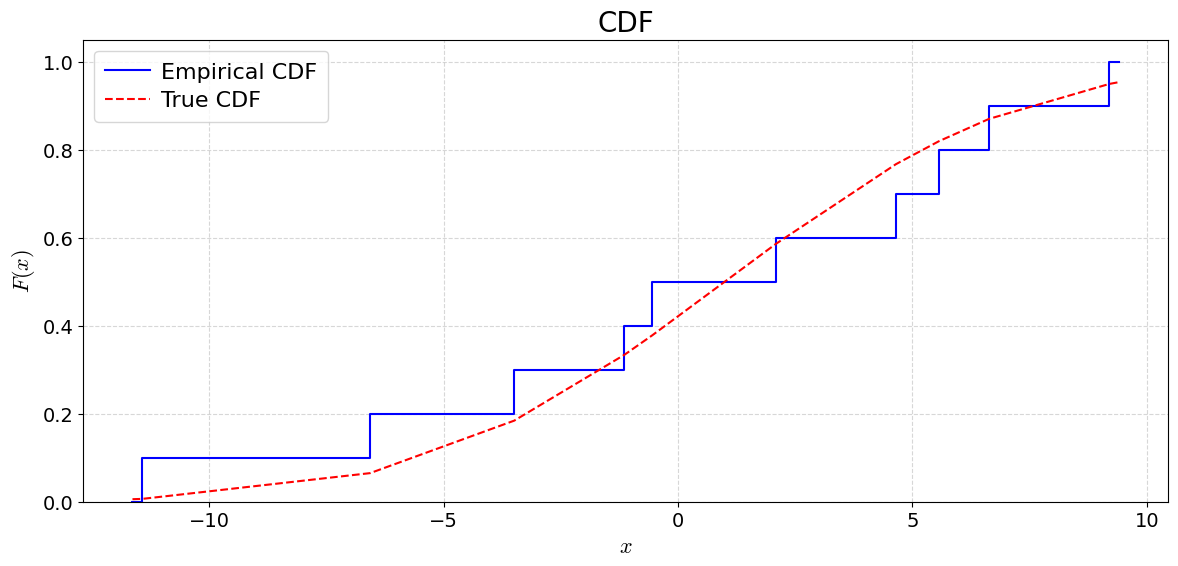

In [5]:
gen = norm(loc=1, scale=5)
plot_continuous_distribution(gen, size=10)

### 2.2 $\chi^2$ distribution

Pronounced "chi-squared".

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

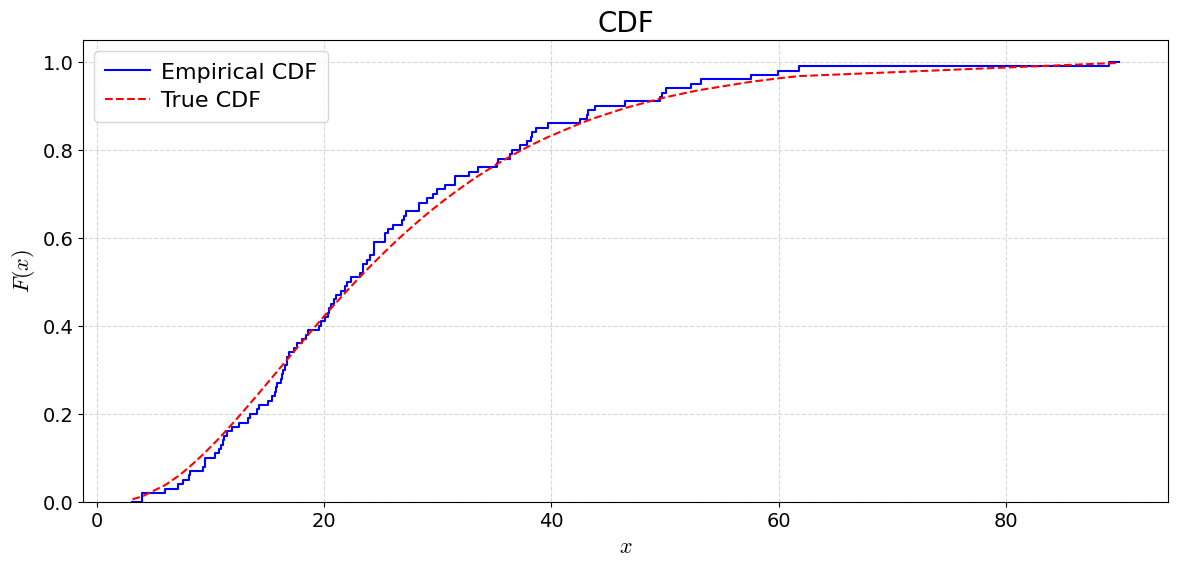

In [6]:
gen = chi2(df=5, loc=1, scale=5)
plot_continuous_distribution(gen, size=100)

### 2.3 Student distribution

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

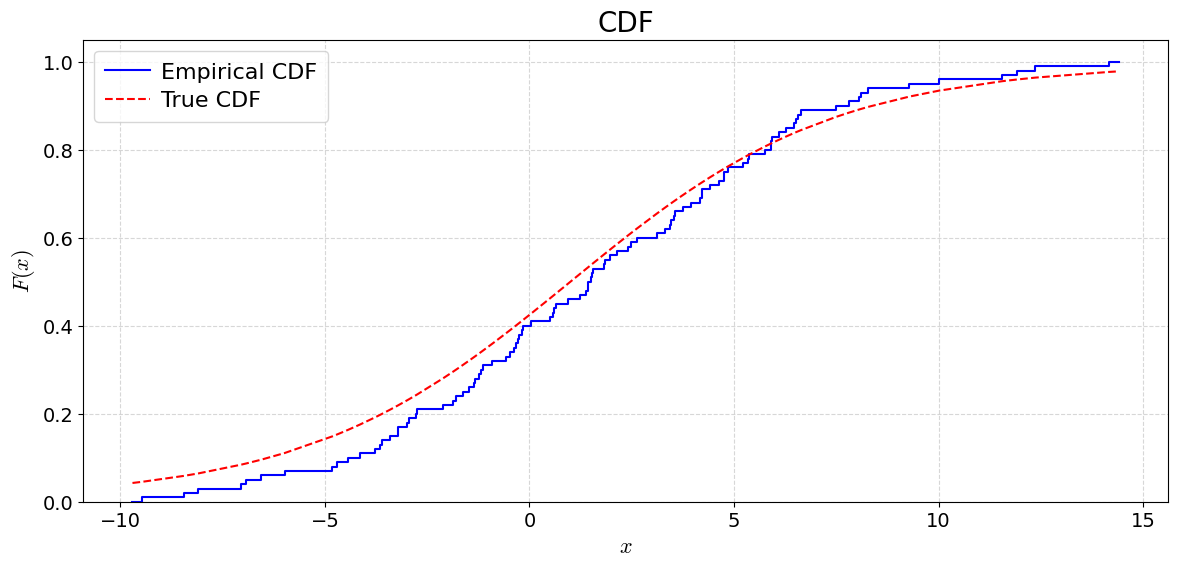

In [7]:
gen = t(df=5, loc=1, scale=5)
plot_continuous_distribution(gen, 100)

### 2.2.4 Triangular distribution

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

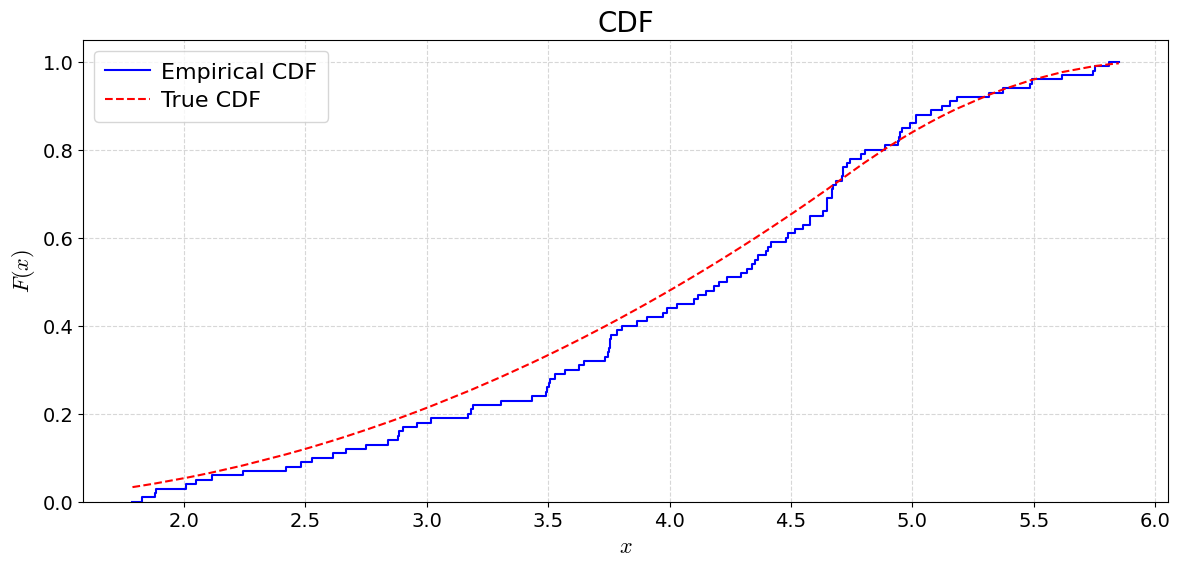

In [8]:
gen = triang(c=0.75, loc=1, scale=5)
plot_continuous_distribution(gen, size=100, covariance_factor=0.25)

# 2. Central Limit Theorem

Probability mass function (PMF) shows the frequences of values in the sample.

<img src="images/pdf_discrete.png" width="500"  class="center">

If the random variable in question is continuous, and we can talk about its probability density function (if it exists). 

<img src="images/pdf_continuous.png" width="500"  class="center">

We can represent empirical versions of PDF or PMF as a histogram of the observed values. Below we are going to show how the distribution of the mean converges to the normal one by observing that histogram starts to be well approximated by the normal distribution with increasing sampel size.

Your task:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

In [10]:
# !!! this part should be implemented by students
# Function to generate samples from exponential distribution and calculate mean
def generate_samples_and_mean(size):
    samples = np.random.exponential(scale=1, size=size)
    mean_value = np.mean(samples)
    return mean_value

# Number of repetitions
num_repetitions = 100000

# Number of points in each sample
sample_size = 50

# List to store mean values
mean_values = []

# Generate samples and calculate means
for _ in tqdm(range(num_repetitions), desc="Generating Samples"):
    mean_values.append(generate_samples_and_mean(sample_size))

Generating Samples: 100%|██████████| 100000/100000 [00:00<00:00, 125020.16it/s]


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

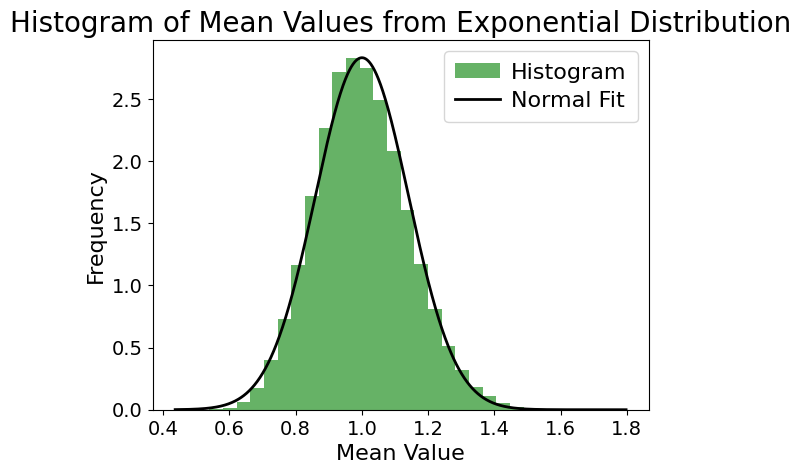

In [11]:
# Plot histogram
plt.hist(mean_values, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

# Fit normal distribution
mu, std = norm.fit(mean_values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')

# Add labels and legend
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Values from Exponential Distribution')
plt.legend()

# Show the plot
plt.show()